<a href="https://colab.research.google.com/github/Missmisa333/Coursera_Capstone/blob/main/Clustering_Toronto_Venue_Categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Postal Code, Borough, and Neighorhood information on Toronto, Canada


## Web Scraping & Data Cleaning

###To create the dataframe below:

* The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
* Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
* More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
* If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
* Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
* In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.


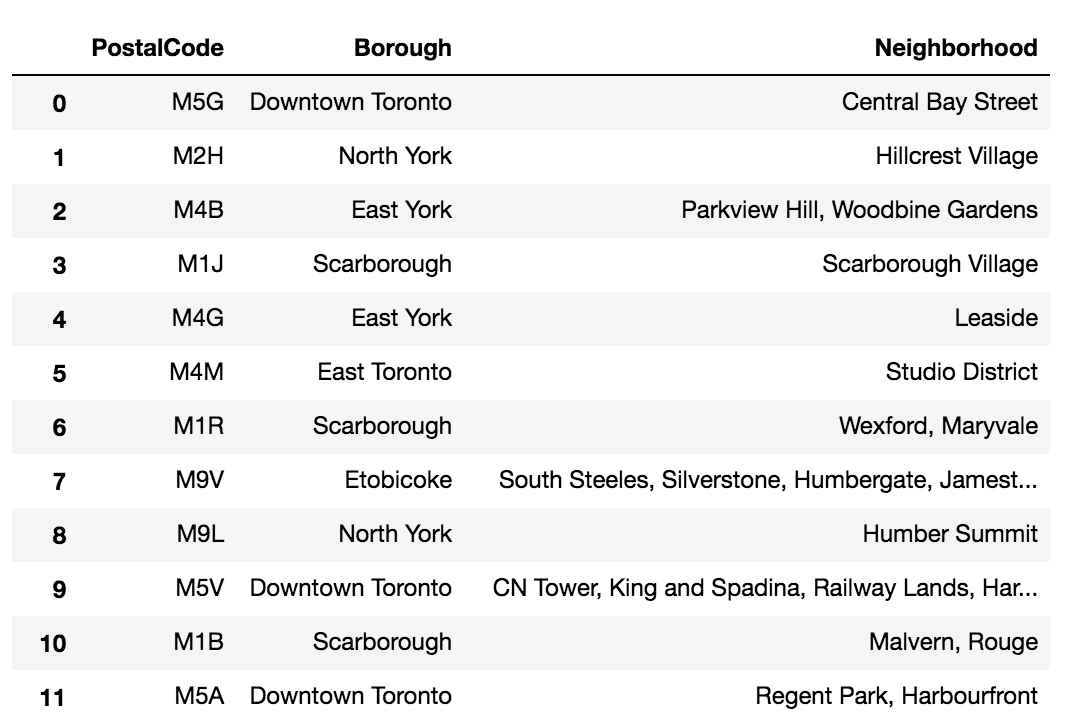


In [308]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [309]:
url_postal_m = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
url_postal_m_data = pd.read_html(url_postal_m, match="M1A", flavor='bs4')[0]
url_postal_m_data.head()

,0,1,2,3,4,5,6,7,8
0,M1ANot assigned,M2ANot assigned,M3ANorth York(Parkwoods),M4ANorth York(Victoria Village),M5ADowntown Toronto(Regent Park / Harbourfront),M6ANorth York(Lawrence Manor / Lawrence Heights),M7AQueen's Park(Ontario Provincial Government),M8ANot assigned,M9AEtobicoke(Islington Avenue)
1,M1BScarborough(Malvern / Rouge),M2BNot assigned,M3BNorth York(Don Mills)North,M4BEast York(Parkview Hill / Woodbine Gardens),"M5BDowntown Toronto(Garden District, Ryerson)",M6BNorth York(Glencairn),M7BNot assigned,M8BNot assigned,M9BEtobicoke(West Deane Park / Princess Garden...
2,M1CScarborough(Rouge Hill / Port Union / Highl...,M2CNot assigned,M3CNorth York(Don Mills)South(Flemingdon Park),M4CEast York(Woodbine Heights),M5CDowntown Toronto(St. James Town),M6CYork(Humewood-Cedarvale),M7CNot assigned,M8CNot assigned,M9CEtobicoke(Eringate / Bloordale Gardens / Ol...
3,M1EScarborough(Guildwood / Morningside / West ...,M2ENot assigned,M3ENot assigned,M4EEast Toronto(The Beaches),M5EDowntown Toronto(Berczy Park),M6EYork(Caledonia-Fairbanks),M7ENot assigned,M8ENot assigned,M9ENot assigned
4,M1GScarborough(Woburn),M2GNot assigned,M3GNot assigned,M4GEast York(Leaside),M5GDowntown Toronto(Central Bay Street),M6GDowntown Toronto(Christie),M7GNot assigned,M8GNot assigned,M9GNot assigned


In [310]:
pcode_df = pd.DataFrame(columns = ['PostalCode', 'Borough', 'Neighborhood'] )
pcode_data = []

def make_table (url, data):
  for i in url.values:
    for text in i:
      text = str(text)
      pcode = text[:3]
      values = text[3:]
      if values == 'Not assigned':
        d = {'PostalCode': pcode,'Borough':values,'Neighborhood': values}
        data.append(d)
        
      else:
        bor = values.split("(",1)[0]
        neigh = values.split("(",1)[1]
        neigh = neigh.strip(")").replace("/",",").replace("(",",").replace(")"," ")
        d= {'PostalCode': pcode, 'Neighborhood': neigh, 'Borough':bor}
        data.append(d)
  
  df = pd.DataFrame.from_records(data)
  return df

df = make_table(url_postal_m_data, pcode_data)

df


,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW , The Queensway West , South of Bloo..."


In [311]:
df['Borough'].unique()
#Weird ones: 'East YorkEast Toronto', 'MississaugaCanada Post Gateway Processing Centre', 'Downtown TorontoStn A PO Boxes25 The Esplanade', 'EtobicokeNorthwest', 'East TorontoBusiness reply mail Processing Centre969 Eastern'

array(['Not assigned', 'North York', 'Downtown Toronto', "Queen's Park",
       'Etobicoke', 'Scarborough', 'East York', 'York', 'East Toronto',
       'West Toronto', 'East YorkEast Toronto', 'Central Toronto',
       'MississaugaCanada Post Gateway Processing Centre',
       'Downtown TorontoStn A PO Boxes25 The Esplanade',
       'EtobicokeNorthwest',
       'East TorontoBusiness reply mail Processing Centre969 Eastern'],
      dtype=object)

In [312]:
df['Borough'] = df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [313]:
df['Borough'].unique()

array(['Not assigned', 'North York', 'Downtown Toronto', "Queen's Park",
       'Etobicoke', 'Scarborough', 'East York', 'York', 'East Toronto',
       'West Toronto', 'East York/East Toronto', 'Central Toronto',
       'Mississauga', 'Downtown Toronto Stn A', 'Etobicoke Northwest',
       'East Toronto Business'], dtype=object)

In [314]:
indexing = -1
list_na = []


for rows in df.values:
  boroughs = rows[1]
  if boroughs == "Not assigned":
    list_na.append(rows[0])

for rows in df.values:
  indexing = indexing + 1
  for boroughs_na in list_na:
    if rows[0] == boroughs_na:
      df = df.drop(labels = indexing, axis = 0)

df


,PostalCode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
160,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto Business,Enclave of M4L
169,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [315]:

df = df.reset_index()
df.drop(columns = 'index', inplace = True)
df

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
...,...,...,...
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto Business,Enclave of M4L
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,..."


In [316]:
print("The Data Frame has {} Columns and {} Rows".format(df.shape[1], df.shape[0]))

The Data Frame has 3 Columns and 103 Rows


##Get Latitude & Longitude Coordinates

###Directions
Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:



```
import geocoder # import geocoder

# initialize your variable to None
lat_lng_coords = None

# loop until you get the coordinates
while(lat_lng_coords is None):
  g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
  lat_lng_coords = g.latlng

latitude = lat_lng_coords[0]
longitude = lat_lng_coords[1]
```



Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: 

GeoSpatial Dataset

Use the Geocoder package or the csv file to create the following dataframe:

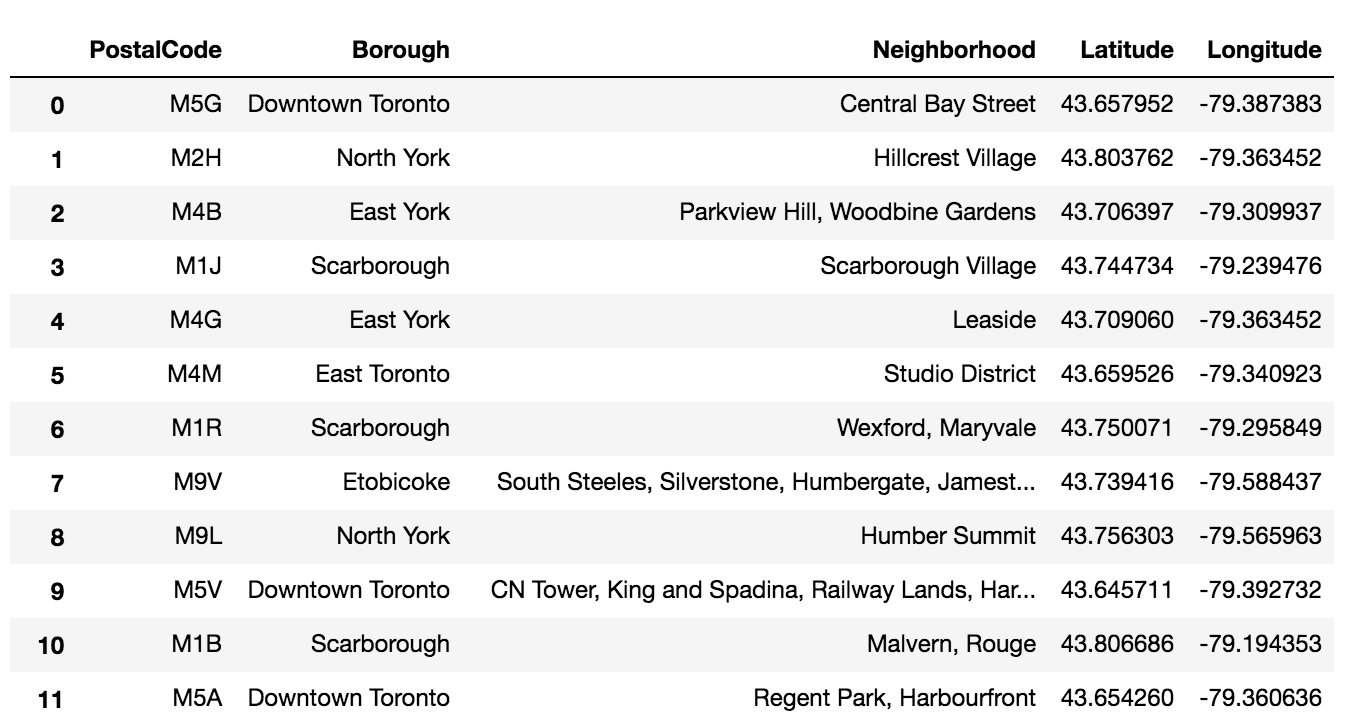

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below

In [317]:
!pip install geopy


In [318]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [319]:
lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
lat_lon.rename(columns = {"Postal Code":"PostalCode"}, inplace = True)
lat_lon

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


In [320]:
df_1 = df.merge(lat_lon)
df_1.tail()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
98,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto Business,Enclave of M4L,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South , King's Mill Park , Sunnylea ,...",43.636258,-79.498509
102,M8Z,Etobicoke,"Mimico NW , The Queensway West , South of Bloo...",43.628841,-79.520999


##Explore and cluster the neighborhoods in Toronto

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

to add enough Markdown cells to explain what you decided to do and to report any observations you make. 
to generate maps to visualize your neighborhoods and how they cluster together. 
Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)

###Map of all of the neighborhoods

In [321]:

from geopy import Nominatim


address = 'Toronto, Canada'
geolocator = Nominatim(user_agent = 'users')
location = geolocator.geocode(address)
lat_tc = location.latitude
lng_tc = location.longitude

print("{}; Latitude: {}, Longitude {}".format(address, lat_tc,lng_tc))



Toronto, Canada; Latitude: 43.6534817, Longitude -79.3839347


In [322]:
import folium # map rendering library

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[lat_tc, lng_tc], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_1['Latitude'], df_1['Longitude'], df_1['Borough'], df_1['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

###Four Square Authorization

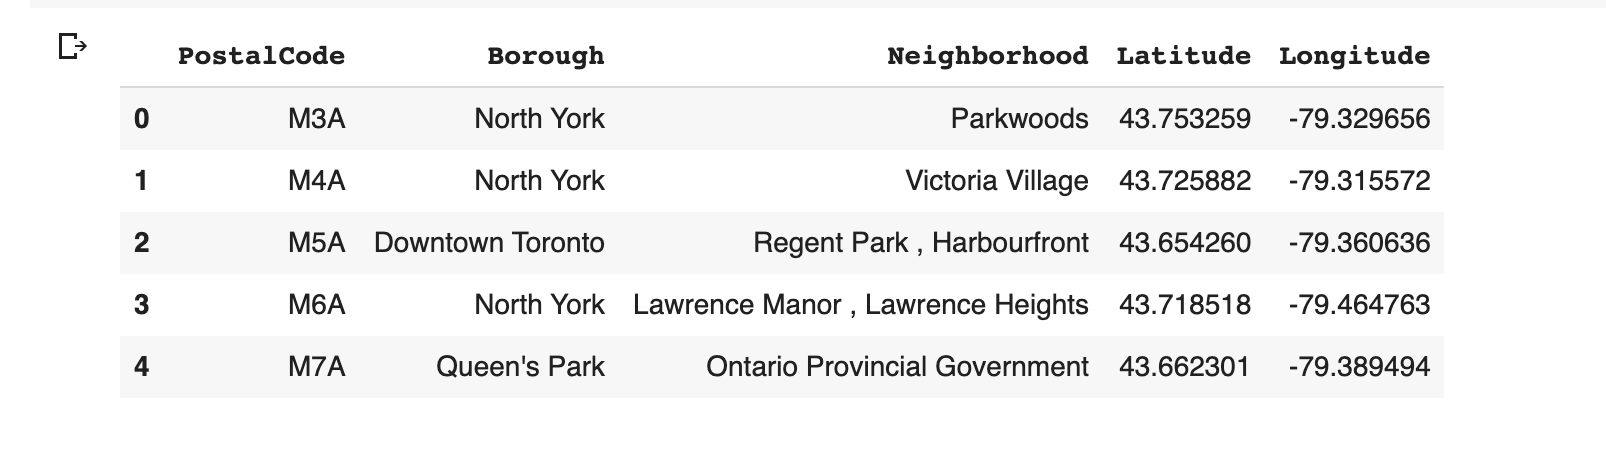

In [323]:
CLIENT_ID = 'HPZT5MCPF2PMR0WK1PWIOV2QQULD0XWNYES3R1HP5ERK44B4' # your Foursquare ID
CLIENT_SECRET = 'TVOD14FDILT5JOIOMJDKBMKVAXUHV41ZB3WIT4DPD2P5R1JM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HPZT5MCPF2PMR0WK1PWIOV2QQULD0XWNYES3R1HP5ERK44B4
CLIENT_SECRET:TVOD14FDILT5JOIOMJDKBMKVAXUHV41ZB3WIT4DPD2P5R1JM


###Get the top 100 venues that are within a radius of 500 meters of Parkwoods Toronto, Ontario Canada

In [324]:
parkwoods = df_1.loc[df_1['Neighborhood'] == 'Parkwoods']
parkwoods

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656


In [325]:
parkwoods_lat = float(round(parkwoods['Latitude'],2))
parkwoods_lng = float(round(parkwoods['Longitude'],2))


In [326]:
import requests
import json
# type your answer here
radius = 500
limit = 30

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,parkwoods_lat,parkwoods_lng,VERSION,radius,limit)
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()


In [327]:
venue_infos = []
category_infos = []
dd = {}
d = {}

for i in results['response']['groups']:
  for ii in i['items']:
    name = ii['venue']['name']
    lat = ii['venue']['location']['lat']
    lng = ii['venue']['location']['lng']
    d = {'name':name, 'latitude':lat, 'longitude':lng}
    venue_infos.append(d)
    for iii in ii['venue']['categories']:
      cat_info = iii['name']
      dd = {'category': name}
      category_infos.append(dd)


venue_infos = pd.DataFrame.from_dict(venue_infos).reset_index()
category_infos = pd.DataFrame.from_dict(category_infos).reset_index()

venue_df = venue_infos.merge(category_infos)

# shift column 'category' to category_column
category_column = venue_df.pop('category')
  
# insert column using insert(position,column_name, category_column) function
venue_df.insert(2, 'category', category_column)
venue_df

,index,name,category,latitude,longitude
0,0,Brookbanks Park,Brookbanks Park,43.751976,-79.332140
1,1,PetSmart,PetSmart,43.748639,-79.333488
2,2,The Bing Suites,The Bing Suites,43.747816,-79.332190
3,3,Variety Store,Variety Store,43.751974,-79.333114


### Generalize to all neighborhoods

In [328]:
def gather_data(dataframe, neighborhood_name):
  #dataframe must have lat long information in it about the specific neighborhood
  #Client ID, and other credential information must be defined earlier
  df_neighbor = dataframe.loc[dataframe['Neighborhood'] == neighborhood_name]
  lat = float(df_neighbor['Latitude'])
  lng = float(df_neighbor['Longitude'])
  radius = 500
  limit = 100
  url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,lat,lng,VERSION,radius,limit)
  #from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
  results = requests.get(url).json()
  return results

def sort_data (results):
  venue_infos = []
  category_infos = []
  dd = {}
  d = {}
  for i in results['response']['groups']:
    for ii in i['items']:
      name = ii['venue']['name']
      lat = ii['venue']['location']['lat']
      lng = ii['venue']['location']['lng']
      d = {'venue_name':name, 'venue_latitude':lat, 'venue_longitude':lng}
      venue_infos.append(d)
      for iii in ii['venue']['categories']:
        cat_info = iii['name']
        dd = {'venue_category': cat_info}
        category_infos.append(dd)


  venue_infos = pd.DataFrame.from_dict(venue_infos).reset_index()
  category_infos = pd.DataFrame.from_dict(category_infos).reset_index()

  venue_df = venue_infos.merge(category_infos)

  # shift column 'category' to category_column
  category_column = venue_df.pop('venue_category')
    
  # insert column using insert(position,column_name, category_column) function
  venue_df.insert(2, 'venue_category', category_column)
  return venue_df

In [329]:
name = 'Parkwoods'
parkwoods_info = gather_data(df_1, name)
parkwoods_df = sort_data(parkwoods_info)
parkwoods_df['neighborhood'] = name
parkwoods_df['neighborhood_latitude'] = parkwoods_lat
parkwoods_df['neighborhood_longitude'] = parkwoods_lng

In [330]:
neighborhood_names_df = df_1['Neighborhood'].values + '_df'


In [ ]:
#df_info = pd.DataFrame(columns = [['index', 'name', 'category', 'latitude', 'longitude', 'neighborhood']])
df_info = parkwoods_df

neighborhood_names = df_1['Neighborhood'].values
neighborhood_df_names = neighborhood_names + '_df'
neighborhood_lat = df_1['Latitude'].values
neighborhood_lng = df_1['Longitude'].values

for a, b,c,d in zip(neighborhood_names, neighborhood_df_names,neighborhood_lat,neighborhood_lng):
  infos = gather_data(df_1, a)
  if infos['response']['totalResults'] == 0:
    print("No results: ", a)
  else:
    b = sort_data(infos)
    b['neighborhood'] = a
    b['neighborhood_latitude'] = c
    b['neighborhood_longitude'] = d
    df_info = df_info.append(b).reset_index().drop(columns = ['level_0', 'index'])
df_info.head()

##K Clustering Time
Let's take a look at the most common venue categories in each Toronto neighborhood, and then use this feature to group the neighborhoods into clusters that are similar in terms of the most common venues. 

###Understanding Toronto in general

In [ ]:
pd.value_counts(df_info['venue_category']).to_frame().head()

In [ ]:
pd.value_counts(df_info['venue_name']).to_frame().head()

In [ ]:
print("There are a total of {} venues in Toronto".format(df_info.shape[0]))

In [402]:
len(df_info['neighborhood'].unique())

1

##Toronto Overall:
There are a total of 2131 venues in Toronto and 100 different neighborhoods with venues within 500m of them. 

 It looks like the most common venue categories in Toronto are Coffee Shops/Cafes. Which is not surprising, seeing that there are 61 Starbucks in Toronto. Then the next common are restraunts, then parks. Which is also not suprising seeing that Tim Hortons and Subway are the 2nd and 3rd most common venue names.

###Finding the top 10 Venue cateogires in each neighborhood so we can cluster them

In [ ]:
df_tornto = df_info
df_tornto_freq = pd.get_dummies(data = df_tornto[['venue_category']], prefix = "",  prefix_sep="")
print("shape of the dataframe ", df_tornto_freq.shape)

# add neighborhood column back to dataframe
df_tornto_freq['neighborhood'] = df_tornto['neighborhood'] 

# Make neighborhood the first column in the dataframe
columns_inorder = [df_tornto_freq.columns[-1]]+list(df_tornto_freq.columns[:-1])
df_tornto_freq = df_tornto_freq[columns_inorder]

#df_tornto_freq will now show what venues categories make up the neighborhood in %/100(the probabiliy that if you go to a venue in this neighborhood that it will be in that category)
df_tornto_freq = df_tornto_freq.groupby('neighborhood', axis = 0).mean().reset_index()
print("shape of the dataframe ", df_tornto_freq.shape)
df_tornto_freq.head()

In [ ]:
num_top_venues = 10

number_suffexes = ['st', 'nd', 'rd']

# create columns according to number of top venues
top_catgry_colnames = ['Neighborhood']
for number in range(num_top_venues):
    try:
        top_catgry_colnames.append('{}{} Most Common Venue'.format(number+1, number_suffexes[number]))
    except:
        top_catgry_colnames.append('{}th Most Common Venue'.format(number+1))
        
top_catgry_colnames

In [ ]:
import numpy as np

def top_venue_list(df, row_num, num_togo_to):
  row_info = df.iloc[row_num,1:] #Get one neighborhood's information at a time
  row_sorted = row_info.sort_values(ascending = False) #Sort the venue categories from top to least common
  row_top_sorted = row_sorted.index.values[0:10] #Get just the top 10
  #insert neighborhood name back in
  row_top_sorted = np.insert(row_top_sorted, 0, df.iloc[row_num,0])

  return row_top_sorted


d = []

for neighborhood_row_num in range(df_tornto_freq.shape[0]):
  top_catgry_df_info = top_venue_list(df_tornto_freq, neighborhood_row_num ,num_top_venues)

  d.append(top_catgry_df_info)

df_tp10_vncatgry_by_neigh = df_clustered =  pd.DataFrame(d,columns = top_catgry_colnames ) 
df_tp10_vncatgry_by_neigh

###Make groups of neighborhoods that have the most similar common venue categories

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

top_vencatgry_clustering = df_tornto_freq.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(top_vencatgry_clustering)

# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 
print('You have successfully generated clusters for {} neighborhoods'.format(len(kmeans.labels_)))

In [ ]:
#I wonder how many are in each cluster
df_clusters = pd.value_counts(kmeans.labels_).to_frame().reset_index()
df_clusters.rename(columns = {'index': 'cluster', 0:'# of neighborhoods'}, inplace = True)
df_clusters.sort_values('cluster')

In [ ]:
df_clustered


In [ ]:
df_clustered.insert(1,'Cluster', kmeans.labels_)
df_clustered.head()

###Make a visual

In [339]:
latlng = df_1[['Neighborhood','Latitude','Longitude']]
df_clustered = df_clustered.merge(latlng,on = 'Neighborhood')

In [344]:
df_clustered.columns

Index(['Neighborhood', 'Cluster', '1st Most Common Venue',
       '2nd Most Common Venue', '3rd Most Common Venue',
       '4th Most Common Venue', '5th Most Common Venue',
       '6th Most Common Venue', '7th Most Common Venue',
       '8th Most Common Venue', '9th Most Common Venue',
       '10th Most Common Venue', 'Latitude', 'Longitude'],
      dtype='object')

In [401]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[lat_tc, lng_tc], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_clustered['Latitude'], df_clustered['Longitude'], df_clustered['Neighborhood'], df_clustered['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [390]:
def look_at_cluster(num):
  df_cluster = df_clustered.loc[df_clustered['Cluster'] == num]
  print("Cluster {}: There are {} neighborhoods in this cluster".format(num,len(df_cluster) ))
  cluster_1st = pd.value_counts(df_cluster['1st Most Common Venue']).to_frame().reset_index().reset_index()
  cluster_2nd = pd.value_counts(df_cluster['2nd Most Common Venue']).to_frame().reset_index().reset_index()
  cluster_3rd = pd.value_counts(df_cluster['3rd Most Common Venue']).to_frame().reset_index().reset_index()
  
  return cluster_1st.merge(cluster_2nd,on = 'level_0').merge(cluster_3rd,on = 'level_0').head()


In [395]:
look_at_cluster(0)

Cluster 0: There are 83 neighborhoods in this cluster


,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Coffee Shop,22,Sandwich Place,6,Park,5
1,1,Pizza Place,8,Coffee Shop,6,Coffee Shop,4
2,2,Café,8,Café,6,Yoga Studio,4
3,3,Discount Store,3,Bakery,4,Convenience Store,3
4,4,Bakery,3,Yoga Studio,3,Pizza Place,3


It looks like Cluster 0 is mainly neighborhoods with a lot of Coffee shops/cafes [and maybe Sandwich Places & Pizza Places]

In [394]:
look_at_cluster(1)

Cluster 1: There are 2 neighborhoods in this cluster


,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Baseball Field,2,Yoga Studio,2,Eastern European Restaurant,2


Cluster 1 only has 2 neighborhood in it and it is one that maily just has a baseball field in it

In [391]:
look_at_cluster(2)

Cluster 2: There are 10 neighborhoods in this cluster


,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Park,8,Park,2,Trail,2
1,1,Intersection,1,River,1,Yoga Studio,2
2,2,Fast Food Restaurant,1,Sushi Restaurant,1,Construction & Landscaping,1


Cluster 2 maily looks like it is nature based with Parks & Trails

In [393]:
look_at_cluster(3)

Cluster 3: There are 4 neighborhoods in this cluster


,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Park,3,Convenience Store,2,Yoga Studio,2
1,1,Intersection,1,Park,1,Dumpling Restaurant,1


In [399]:
df_clustered.loc[df_clustered['Cluster'] == 3]

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
83,The Danforth East,3,Intersection,Park,Convenience Store,Eastern European Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,43.685347,-79.338106
92,Weston,3,Park,Convenience Store,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,43.706876,-79.518188
94,"Willowdale , Newtonbrook",3,Park,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant,43.789053,-79.408493
99,York Mills West,3,Park,Convenience Store,Yoga Studio,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,43.752758,-79.400049


Cluster 3 looks similar to cluster 2 and has Parks but has more emphasis on Convenience Stores

In [396]:
look_at_cluster(4)

Cluster 4: There are 1 neighborhoods in this cluster


,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Restaurant,1,Yoga Studio,1,Drugstore,1


In [398]:
df_clustered.loc[df_clustered['Cluster'] == 4]

,Neighborhood,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Latitude,Longitude
57,"Moore Park , Summerhill East",4,Restaurant,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Dim Sum Restaurant,43.689574,-79.38316


## Understanding the Clusters


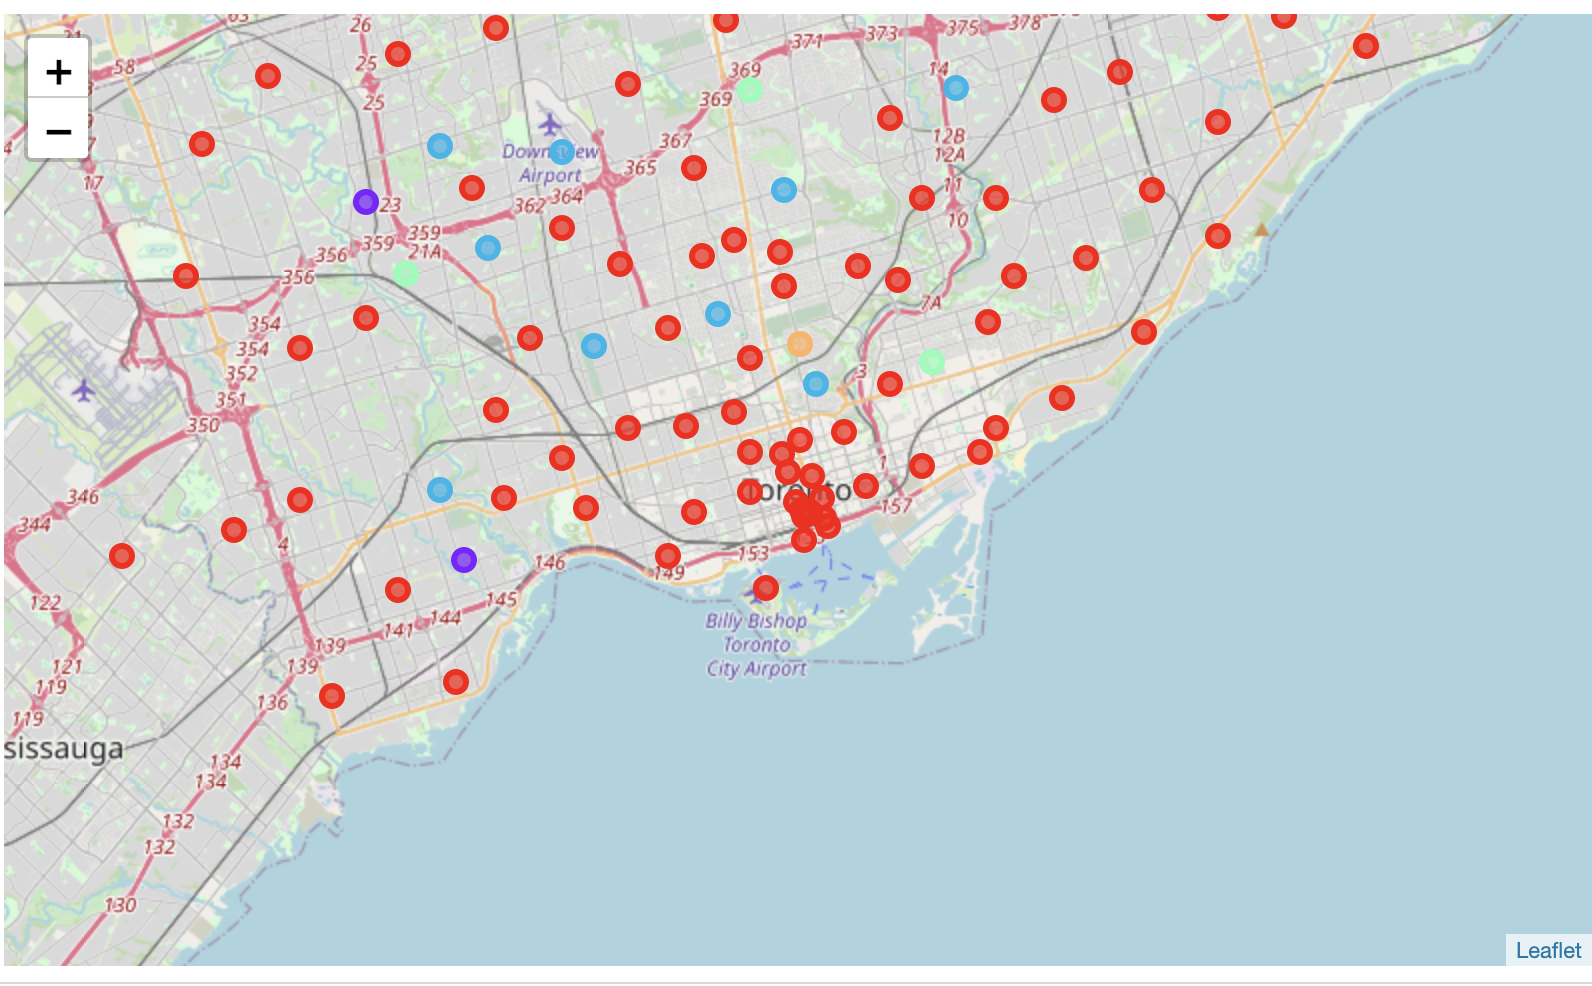

This may look slightly different each time

Cluster 0: (83 neighborhoods)

> It looks like Cluster 0 is mainly neighborhoods with a lot of Coffee shops/cafes [and maybe Sandwich Places & Pizza Places]  

Cluster 1: (2 neighborhoods)
> Cluster 1 only has 2 neighborhood in it and it is one that maily just has a baseball field in it


Cluster 2: (10 neighborhoods)
>Cluster 2 maily looks like it is nature based with Parks & Trails

Cluster 3: (4 neighborhoods)
>Cluster 3 looks similar to cluster 2 and has Parks but has more emphasis on Convenience Stores

Cluster 4: (1 neighborhood)
>emphasis on restraunts and other misallanious 




#Extra unnecessary cells


In [ ]:
"""
df_info = parkwoods_df.append(v_df).reset_index().drop(columns = ['level_0', 'index'])
"""

In [ ]:
"""
a = []
for i in df_1.values:
  print(i[0],i[1],i[2])
  x = i[3],i[4]
  x = str(x)
  print(x)
"""

In [ ]:
"""
from geopy import Nominatim

address = "M7Y East TorontoBusiness reply mail Processing Centre969 Eastern Enclave of M4L"
geolocator = Nominatim(user_agent = 'users')
location = geolocator.geocode(address)
lat = location.latitude
lng = location.longitude

print("{}; Latitude: {}, Longitude {}".format(address, lat, lng))
"""

In [ ]:
"""
from geopy import Nominatim

address = 'M8X Etobicoke The Kingsway , Montgomery Road , Old Mill North'
geolocator = Nominatim(user_agent = 'users')
location = geolocator.geocode(address)
lat = location.latitude
lng = location.longitude

print("{}; Latitude: {}, Longitude {}".format(address, lat, lng))
"""

In [ ]:
#df_latlng.head(33)

In [ ]:
"""
df['PostalCode'] = df['PostalCode'].replace({'M9B': 'M9B 4N3', 
                                             'M6E' : 'M6E 1Y2',
                                             'M3H': 'M3H 1N1', 
                                             'M1K': 'M1K 3N7',
                                             'M5K':'M5K 1H6',
                                             'M1L':'M1L 1V6',
                                             'M4L': 'M4L 3B3',
                                             'M5L':'M5H',
                                             'M1M': 'M1M 1P2',
                                             'M5M': 'M5M 3Z6',
                                             'M6M': 'M6M 5E6',
                                             'M1N': 'M1N 3J7',
                                             'M1P':'M1P 3J3',
                                             'M1R':'M1R 3V3',
                                             'M5R':'M5R 1V7',
                                             'M7R': 'L4W 1T0',
                                             'M1T':'M1T 3K7',
                                             'M5T':'M5T 2E7',
                                             'M1V':'M1V 1W5',
                                             'M4V':'M4V 3A5',
                                             'M8V':'M8V 2X4',
                                             'M9V':'M9V 0A1',
                                             'M5W':'M5E',
                                             'M9W':'M9W 7C8',
                                             'M5X':'M5H',
                                             'M8X':'M8X 2L5',
                                             'M7Y': 'M4L 3B3',
                                             'M8Y':'M8Y 3J8',
                                             'M8Z':'M8Z 1R6'})
                                             """

In [ ]:
"""
from geopy import Nominatim

df_latlng = pd.DataFrame(columns = ["Latitude", "Longitude"])
data_latlng = []

for row in df.values:
  address = row[0]
  geolocator = Nominatim(user_agent = 'apps')
  location = geolocator.geocode(address)
  if location == None:
    address = "{}, {}".format(row[1], row[2])
    location = geolocator.geocode(address)
    if location == None:
      address = "{}, Canada".format(row[0])
      location = geolocator.geocode(address)
    lat = location.latitude
    lng = location.longitude
    d= {'Latitude': lat, 'Longitude': lng}
  else:
    lat = location.latitude
    lng = location.longitude
    d= {'Latitude': lat, 'Longitude': lng}


    

  data_latlng.append(d)
  df_latlng = pd.DataFrame.from_dict(data_latlng)
"""

In [ ]:
"""
address, (latitude, longitude) = geolocator.reverse("43.7545, -79.33")
print (address, latitude, longitude)
"""

In [ ]:
"""
v_info = gather_data(df_1, 'Regent Park , Harbourfront')
v_df = sort_data(v_info)
v_df['neighborhood'] = 'Regent Park , Harbourfront'
v_df
"""

In [376]:
"""
df_cluster0 = df_clustered.loc[df_clustered['Cluster'] == 0]
cluster_0_1st = pd.value_counts(df_cluster0['1st Most Common Venue']).to_frame().reset_index().reset_index()
cluster_0_2nd = pd.value_counts(df_cluster0['2nd Most Common Venue']).to_frame().reset_index().reset_index()
cluster_0_3rd = pd.value_counts(df_cluster0['3rd Most Common Venue']).to_frame().reset_index().reset_index()

cluster_0_1st.merge(cluster_0_2nd,on = 'level_0').merge(cluster_0_3rd,on = 'level_0').head()
"""

,level_0,index_x,1st Most Common Venue,index_y,2nd Most Common Venue,index,3rd Most Common Venue
0,0,Coffee Shop,22,Sandwich Place,6,Park,5
1,1,Pizza Place,8,Coffee Shop,6,Coffee Shop,4
2,2,Café,8,Café,6,Yoga Studio,4
3,3,Discount Store,3,Bakery,4,Convenience Store,3
4,4,Bakery,3,Yoga Studio,3,Pizza Place,3
